<a href="https://colab.research.google.com/github/ahmadmirza17/car_fuel_consumption-knn/blob/main/knn_car_fuel_consumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas.plotting
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from pandas.plotting import scatter_matrix

In [ ]:
df = pd.read_csv("fuel_econ.csv")

df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [ ]:
vclass = df.VClass.unique()
print(vclass)
print(df['VClass'])

['Subcompact Cars' 'Compact Cars' 'Midsize Cars' 'Large Cars'
 'Minicompact Cars']
0       Subcompact Cars
1          Compact Cars
2          Compact Cars
3          Compact Cars
4          Midsize Cars
             ...       
3924       Midsize Cars
3925       Midsize Cars
3926       Midsize Cars
3927       Midsize Cars
3928       Midsize Cars
Name: VClass, Length: 3929, dtype: object


In [ ]:
df['VClass'] = df['VClass'].astype('category')
df['class_label'] = df['VClass'].cat.codes
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,class_label
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,0
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,0
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,0
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,2


In [ ]:
X = df[['cylinders', 'displ', 'comb', 'co2']]
y = df['class_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

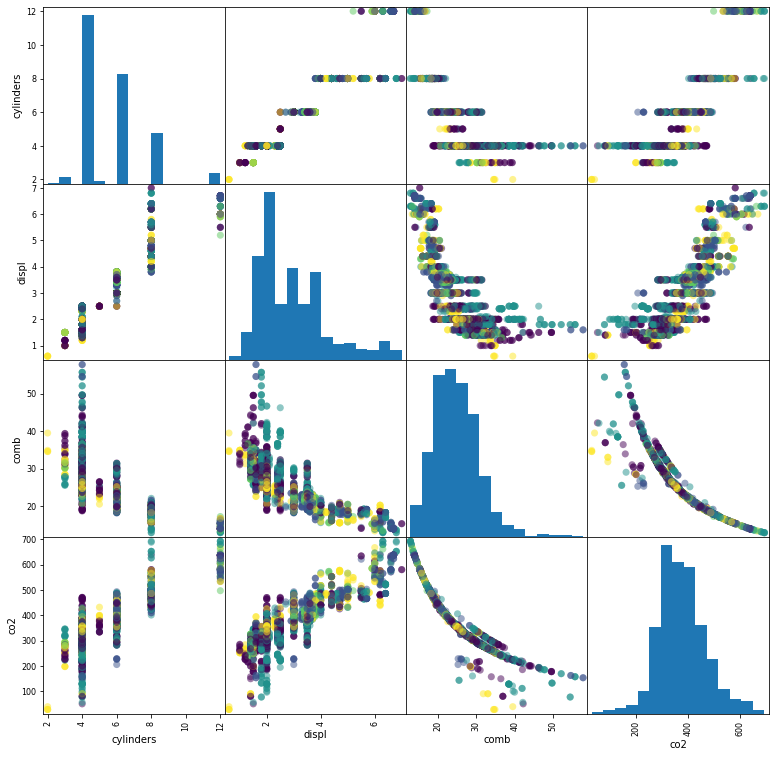

In [ ]:
scatter = scatter_matrix(X_train, c= y_train, marker='o', s=50, hist_kwds={'bins':15}, figsize=(13,13))


In [ ]:
df.describe

<bound method NDFrame.describe of          id        make             model  ...  feScore ghgScore class_label
0     32204      Nissan              GT-R  ...        4        4           4
1     32205  Volkswagen                CC  ...        6        6           0
2     32206  Volkswagen                CC  ...        5        5           0
3     32207  Volkswagen        CC 4motion  ...        5        5           0
4     32208   Chevrolet    Malibu eAssist  ...        8        8           2
...     ...         ...               ...  ...      ...      ...         ...
3924  39882      Toyota       Prius Prime  ...       10       10           2
3925  39898     Hyundai     Sonata Hybrid  ...        9        9           2
3926  39899     Hyundai  Sonata Hybrid SE  ...        9        9           2
3927  39900       Lexus            LS 500  ...        5        5           2
3928  39901       Lexus        LS 500 AWD  ...        4        4           2

[3929 rows x 21 columns]>

In [26]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

knn.score(X_test, y_test)

0.4587995930824008

In [27]:
'''
Let's try using a Ford Fiesta 1.0 Ecoboost with 3 cyl
1.0Litre of displacement, a combined fuel economy of 40.7mpg and 99g of CO2 per 100km'''
cars_prediction = knn.predict([[3, 1.0, 40.7, 99]])
cars_prediction[0]

4

([<matplotlib.axis.XTick at 0x7f0f5fb6ec50>,
 <a list of 5 Text major ticklabel objects>)

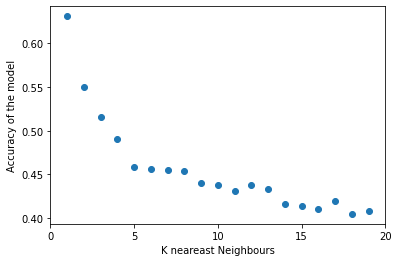

In [41]:
%matplotlib inline 
scores = []

for k in np.arange(1,20):
  knn = KNeighborsClassifier(n_neighbors = k)
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('K neareast Neighbours')
plt.ylabel('Accuracy of the model')
plt.scatter(np.arange(1,20), scores)
plt.xticks([0,5,10,15,20])

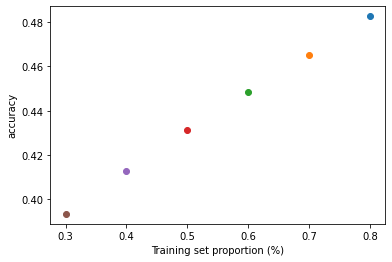

In [42]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:
    scores = []
    for i in range(1,500):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'o')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');